
# How long does it take to get a message if the inquiry gets requected? How long if it is certified?

# Herkunftsländer der Arbeitnehmer

In [783]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../own_style.mplstyle')
from scipy.stats import linregress

In [784]:
# cleanup.generate_cleaned_df()

In [785]:

col_list = ["case_status", "case_received_date", "decision_date", "prevailing_wage_amount_9089", "prevailing_wage_unit_of_pay_9089"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,



The data was read. The necessary columns are:

case_status
case_received_date
decision_date
We'll look at each of them.

In [786]:

visas_df.head()

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089
0,NaN,2012-02-01,Certified,75629.00,yr
1,NaN,2011-12-21,Denied,37024.00,yr
2,NaN,2011-12-01,Certified,47923.00,yr
3,NaN,2011-12-01,Certified,10.97,hr
4,NaN,2012-01-26,Certified,94890.00,yr


How much values do we have in the seperate columns?


case_received_date
239091/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows

decision_date
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows

case_status
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows

prevailing_wage_amount_9089
372146/374362 99%
Filled: |█████████████████████████████████████████████████-| 99.4% Rows

prevailing_wage_unit_of_pay_9089
372790/374362 100%
Filled: |█████████████████████████████████████████████████-| 99.6% Rows



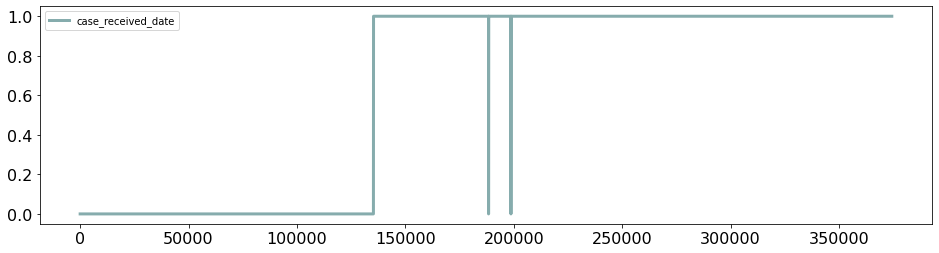

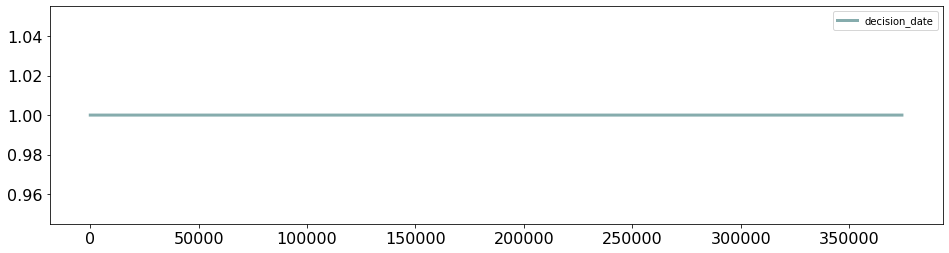

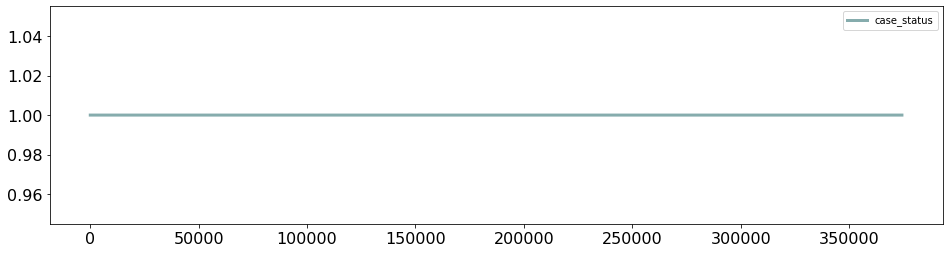

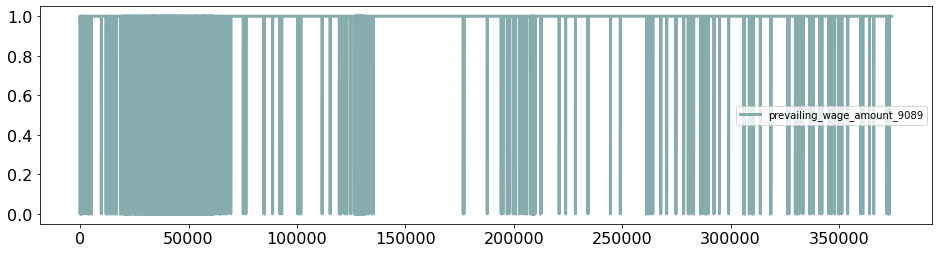

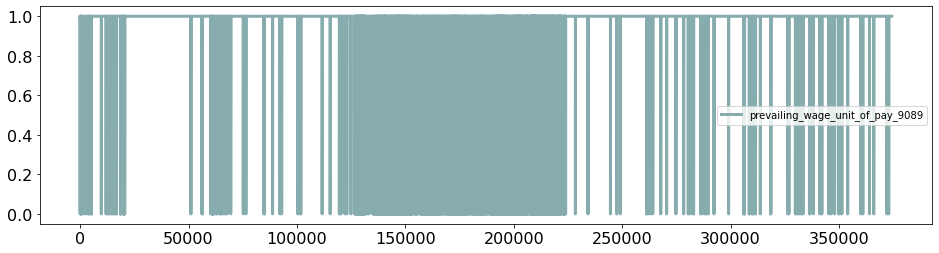

In [787]:

import modules
modules.print_count_of_values_relation(visas_df, True, True)

In [788]:
visas_df['case_received_date'].notna()


0         False
1         False
2         False
3         False
4         False
          ...  
374357     True
374358     True
374359     True
374360     True
374361     True
Name: case_received_date, Length: 374362, dtype: bool

<AxesSubplot:>

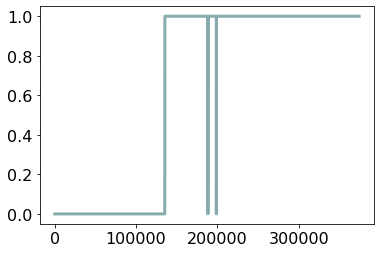

In [789]:
visas_df['case_received_date'].notna().astype(int).plot(x='index')


## case_status

## case_received_date



In [790]:
visas_df['case_received_date'].value_counts()


2014-06-30    767
2015-09-30    696
2015-06-30    695
2015-06-29    691
2016-06-29    670
             ... 
2012-02-29      1
2010-04-06      1
2007-08-17      1
2011-07-13      1
2010-05-10      1
Name: case_received_date, Length: 2180, dtype: int64

In [791]:

visas_df['case_received_date'].dtypes

dtype('O')

Datatypoe is object. This has to be comverted to DateObject.



In [792]:
visas_df['case_received_date'] = pd.to_datetime(visas_df['case_received_date'])

In [793]:

visas_df['decision_date'] = pd.to_datetime(visas_df["decision_date"])

In [794]:

visas_df['case_received_date'].dtypes

dtype('<M8[ns]')

In [795]:
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 5 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   case_received_date                239091 non-null  datetime64[ns]
 1   decision_date                     374362 non-null  datetime64[ns]
 2   case_status                       374362 non-null  object        
 3   prevailing_wage_amount_9089       372146 non-null  float64       
 4   prevailing_wage_unit_of_pay_9089  372790 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 14.3+ MB


Let's take a quick look at the plausability of the entries.


In [796]:
visas_df['case_received_date'].nsmallest(10)


135468   2006-06-21
244931   2007-07-06
252985   2007-07-20
371796   2007-08-17
135482   2007-09-04
218244   2007-10-19
329959   2007-11-15
135489   2007-12-07
250909   2007-12-07
239942   2007-12-26
Name: case_received_date, dtype: datetime64[ns]

In [797]:
visas_df['case_received_date'].nlargest(10)

374358   2016-12-30
374359   2016-12-30
374360   2016-12-30
374361   2016-12-30
374152   2016-12-29
374153   2016-12-29
374357   2016-12-29
373698   2016-12-28
373742   2016-12-28
373743   2016-12-28
Name: case_received_date, dtype: datetime64[ns]

The values are looking plausable.

## Duration of Decision


In [798]:
visas_df['duration_of_decision'] = visas_df['decision_date']-visas_df['case_received_date']


In [799]:
visas_df.sample(20)

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision
470,NaT,2012-01-23,Withdrawn,71448.00,yr,NaT
44128,NaT,2013-02-28,Certified-Expired,67883.00,yr,NaT
151492,2014-02-20,2015-06-25,Denied,19219.00,yr,490 days
21361,NaT,2012-11-19,Certified-Expired,40.29,hr,NaT
220043,2014-10-22,2015-05-21,Withdrawn,90459.00,yr,211 days
109057,NaT,2014-03-06,Certified-Expired,59640.00,yr,NaT
207225,2015-03-06,2015-09-29,Certified,56014.00,yr,207 days
371703,2016-10-14,2016-12-19,Certified,108139.00,yr,66 days
96333,NaT,2013-11-18,Certified-Expired,60216.00,yr,NaT
59538,NaT,2013-07-02,Denied,122200.00,yr,NaT


Delete all rows without a case_received_date.

In [800]:

visas_df.dropna(subset = ["duration_of_decision"], inplace=True)

In [801]:
visas_df.sample(20)

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision
257407,2015-06-18,2016-01-19,Certified-Expired,48880.0,yr,215 days
273568,2015-09-23,2016-03-01,Certified-Expired,115253.0,yr,160 days
346202,2013-04-15,2016-09-21,Certified,68162.0,yr,1255 days
175045,2014-08-28,2015-01-20,Certified-Expired,53373.0,yr,145 days
183621,2014-12-10,2015-06-23,Certified,91957.0,yr,195 days
233878,2015-11-10,2015-11-10,Withdrawn,74110.0,yr,0 days
204376,2015-03-31,2015-09-22,Certified,44500.0,yr,175 days
183154,2014-10-24,2015-03-20,Certified-Expired,104437.0,yr,147 days
190970,2014-10-22,2015-03-13,Certified-Expired,120120.0,yr,142 days
200763,2015-01-23,2015-08-19,Certified,20342.0,yr,208 days


In [802]:

visas_df["duration_of_decision"].size

239091

In [803]:
visas_df['duration_of_decision'] = visas_df['duration_of_decision'].dt.days

In [804]:
visas_df.groupby('case_status')['duration_of_decision'].mean().sort_values()

case_status
Withdrawn            105.814246
Certified            172.393605
Certified-Expired    222.298922
Denied               517.754714
Name: duration_of_decision, dtype: float64

In [805]:

visas_df.groupby('case_status')['duration_of_decision'].describe()

,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,120969.0,172.393605,150.296833,3.0,87.0,125.0,202.0,3082.0
Certified-Expired,95570.0,222.298922,136.983325,79.0,150.0,173.0,198.0,2852.0
Denied,12781.0,517.754714,505.650797,0.0,201.0,399.0,631.0,3413.0
Withdrawn,9771.0,105.814246,168.466313,0.0,1.0,29.0,146.0,3092.0


Klappt die Zertifizierung mittlerweile schneller?

In [806]:
pv = pd.pivot_table(visas_df, index=visas_df['decision_date'].dt.month, columns=visas_df['decision_date'].dt.year,
                    values='duration_of_decision', aggfunc='mean')


pv

decision_date,2014,2015,2016
decision_date,,,
1,NaN,223.875651,214.869200
2,NaN,216.101837,203.904392
3,NaN,352.744863,179.644342
4,NaN,312.642731,173.351460
5,NaN,351.658894,141.371004
6,NaN,347.353954,129.391906
7,NaN,299.127910,126.203789
8,NaN,295.026330,107.940037
9,NaN,255.588960,145.871763


<AxesSubplot:xlabel='decision_date'>

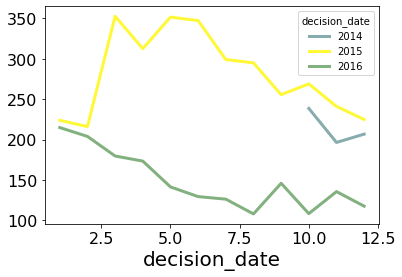

In [807]:
pv.plot()

In [808]:
visas_df["decision_date"].dt.year.value_counts()

2016    124230
2015     96703
2014     18158
Name: decision_date, dtype: int64

In [809]:
visas_df = visas_df[visas_df["case_received_date"].dt.year > 2013]

In [810]:


pv = pd.pivot_table(visas_df, index=visas_df['decision_date'].dt.month, columns=visas_df['decision_date'].dt.year,
                    values='duration_of_decision', aggfunc='mean')


pv

decision_date,2014,2015,2016
decision_date,,,
1,NaN,152.171551,206.696927
2,NaN,147.657466,193.749798
3,NaN,152.671717,175.511448
4,NaN,201.629970,160.491299
5,NaN,172.861204,136.681006
6,NaN,261.771011,120.072874
7,NaN,275.342234,109.381375
8,NaN,268.620880,102.342849
9,NaN,238.638975,105.194944


<AxesSubplot:xlabel='decision_date'>

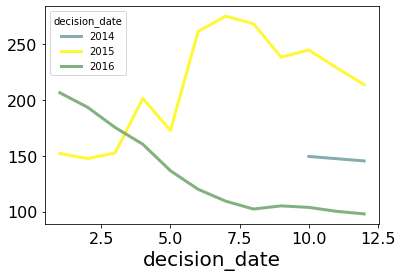

In [811]:
pv.plot()

## scatterplot


In [812]:
visas_df.head()

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision
135275,2014-07-02,2014-12-01,Certified-Expired,55682.0,yr,152
135280,2014-01-02,2015-06-12,Certified,46301.0,yr,526
135287,2014-06-30,2015-09-11,Certified,98675.0,yr,438
135294,2014-01-13,2015-06-23,Certified,46093.0,yr,526
135296,2014-10-19,2015-03-10,Certified-Expired,50024.0,yr,142


In [813]:
visas_df["decision_date"].value_counts()

2015-11-19    1972
2015-11-20    1151
2015-09-18    1103
2015-12-07    1082
2016-03-08    1062
              ... 
2016-12-25       1
2015-06-07       1
2014-11-30       1
2016-08-21       1
2016-05-30       1
Name: decision_date, Length: 704, dtype: int64

In [814]:
visas_df.groupby('case_status')['duration_of_decision'].describe()

,count,mean,std,min,25%,50%,75%,max
case_status,,,,,,,,
Certified,116333.0,152.661180,98.224288,3.0,86.0,120.0,197.0,1002.0
Certified-Expired,87936.0,190.525553,74.777630,79.0,149.0,168.0,190.0,756.0
Denied,8854.0,276.555116,179.585818,0.0,144.0,234.0,428.0,1044.0
Withdrawn,9275.0,78.252507,113.515255,0.0,1.0,22.0,120.0,736.0


In [815]:

visas_df["decision_date"].dt.year.value_counts()

2016    123091
2015     83734
2014     15573
Name: decision_date, dtype: int64

In [816]:

visas_df["prevailing_wage_unit_of_pay_9089"].value_counts()



yr     216769
hr       4460
wk         90
mth        43
bi         11
Name: prevailing_wage_unit_of_pay_9089, dtype: int64

In [817]:


visas_df = visas_df[visas_df["prevailing_wage_unit_of_pay_9089"] == 'yr']

In [818]:

visas_df = visas_df[visas_df.case_status != 'Withdrawn']
visas_df = visas_df[visas_df.case_status != 'Certified-Expired']

In [819]:
visas_df.sample(10)

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision
288842,2015-11-18,2016-04-15,Certified,107910.0,yr,149
153902,2014-05-15,2015-09-02,Certified,79414.0,yr,475
318106,2016-03-29,2016-06-29,Certified,100422.0,yr,92
220269,2015-02-06,2015-09-04,Certified,98384.0,yr,210
312795,2016-03-09,2016-06-16,Certified,111114.0,yr,99
369104,2016-09-23,2016-12-08,Certified,112704.0,yr,76
302940,2016-01-07,2016-05-20,Certified,117603.0,yr,134
370631,2016-10-03,2016-12-14,Certified,98030.0,yr,72
287057,2015-11-09,2016-04-08,Certified,90979.0,yr,151
187163,2014-11-05,2015-04-21,Certified,109762.0,yr,167


In [820]:
visas_df.prevailing_wage_amount_9089 = visas_df.prevailing_wage_amount_9089.astype(int)

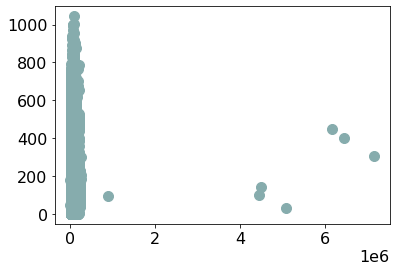

In [821]:

import pandas as pd
import matplotlib.pyplot as plt

x = visas_df.prevailing_wage_amount_9089
y = visas_df.duration_of_decision
plt.scatter(x, y)
plt.show()  # or plt.savefig("name.png")

In [822]:

visas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121437 entries, 135280 to 374353
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   case_received_date                121437 non-null  datetime64[ns]
 1   decision_date                     121437 non-null  datetime64[ns]
 2   case_status                       121437 non-null  object        
 3   prevailing_wage_amount_9089       121437 non-null  int32         
 4   prevailing_wage_unit_of_pay_9089  121437 non-null  object        
 5   duration_of_decision              121437 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 6.0+ MB


In [823]:
visas_df.prevailing_wage_amount_9089.nlargest(10)


371525    7149000
305415    6431400
234182    6156800
174452    5067600
286626    4500000
328973    4438700
208973     885666
198257     252637
324539     251909
178917     251576
Name: prevailing_wage_amount_9089, dtype: int32

In [824]:
#https://nextjournal.com/schmudde/how-to-remove-outliers-in-data
visas_df = visas_df[visas_df.prevailing_wage_amount_9089.between(visas_df.prevailing_wage_amount_9089.quantile(.05), visas_df.prevailing_wage_amount_9089.quantile(.95))] # without outliers

In [825]:
visas_df["decision_year"] = visas_df["decision_date"].dt.year

In [826]:
visas_df = visas_df[visas_df["case_received_date"].dt.year > 2014]

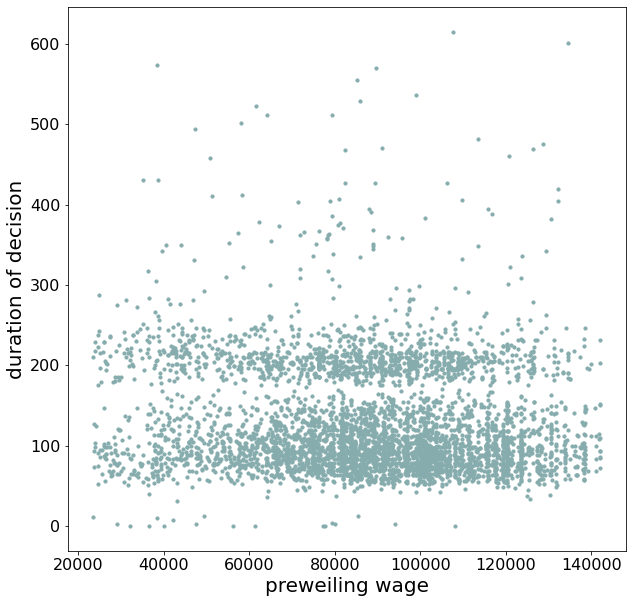

In [827]:
scatdf = visas_df.sample(5000)

import pandas as pd
import matplotlib.pyplot as plt

x = scatdf.prevailing_wage_amount_9089
y = scatdf.duration_of_decision

fig, ax = plt.subplots()
ax.set_xlabel("preweiling wage")
ax.set_ylabel("duration of decision")
plt.gcf().set_size_inches((10, 10))
plt.scatter(x, y, s=10)
plt.show()  # or plt.savefig("name.png")

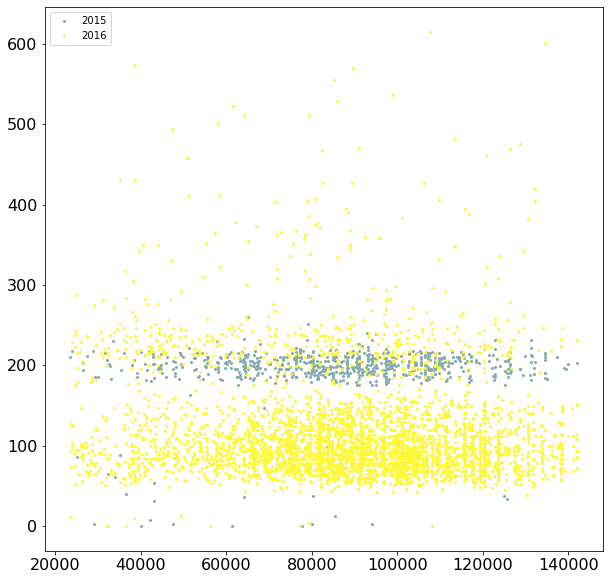

In [828]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Generate Data

labels = scatdf["decision_year"]
groups = scatdf.groupby(by="decision_year")
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.gcf().set_size_inches((10, 10))
plt.show()

In [829]:
x.size

5000

In [830]:
scatdf.head()

,case_received_date,decision_date,case_status,prevailing_wage_amount_9089,prevailing_wage_unit_of_pay_9089,duration_of_decision,decision_year
294276,2015-12-03,2016-04-28,Certified,85342,yr,147,2016
352414,2016-06-15,2016-10-13,Certified,111254,yr,120,2016
343562,2016-06-24,2016-09-13,Certified,96464,yr,81,2016
334994,2016-01-05,2016-08-18,Certified,84157,yr,226,2016
355775,2016-07-22,2016-10-24,Certified,99740,yr,94,2016


In [831]:

scatdf["decision_date"].dt.year.value_counts()

2016    4236
2015     764
Name: decision_date, dtype: int64

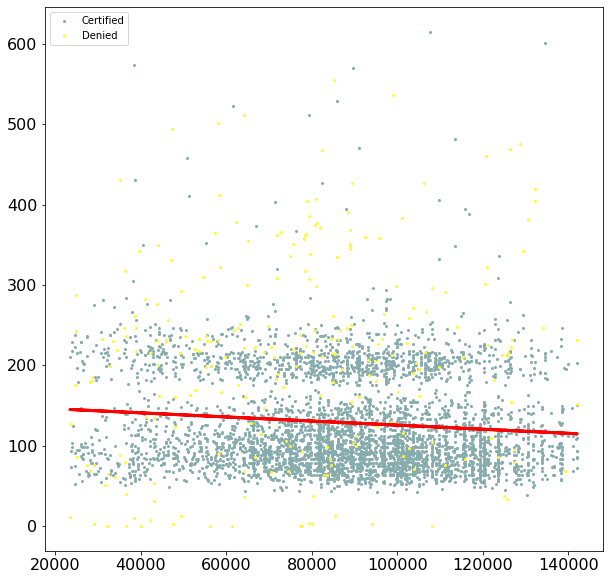

In [832]:
labels = scatdf["case_status"]
groups = scatdf.groupby(by="case_status")
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

stats = linregress(x, y)
m = stats.slope
b = stats.intercept
# Plot
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.gcf().set_size_inches((10, 10))
#plt.plot(x, m * x + b, color="red")
plt.show()